# Predicting Heart-Disease-Calssification using Machine learning 

This notebook looks ito various python based machine learning and data scieence libraries in an attempt to build a machine learning model capabel of predicting whether a person has hert disease or not

Approch and WorkFlow

1. Problem Defination 
2. Data
3. Evaluation 
4. Features 
5. Modeling 
6. Experimentation 

## 1.Problem Defination 

In a statement ,
> Given Clinical parameters about a patient, an we predict wether ofr not they have heart disease???

## Data

>The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

>There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.\


## Features 
**Data Dictionary**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

###  Prepering the Tools

For Analysis and Manipulation





In [1]:
# Importing Libraies essential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# want our plots to apper inside the notebook
%matplotlib inline 

# models for the classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# For Evaluation 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve


In [2]:
df = pd.read_csv("heart-disease.csv")
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Exploration 

>The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.
* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [4]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [5]:
# Compare Target colum with the Sex 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='target'>

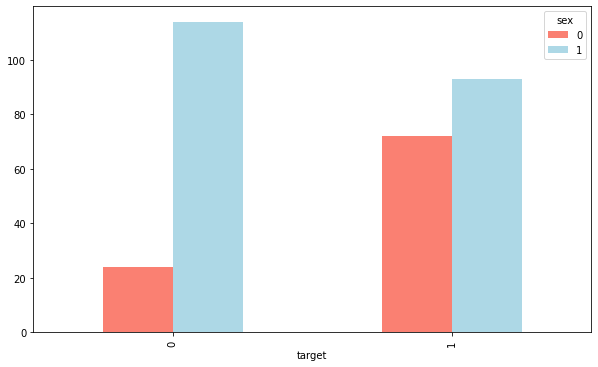

In [6]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                   figsize = (10,6),
                                   color = ["salmon","lightblue"])

## Age vs Max Heart Rate for Heart Disease

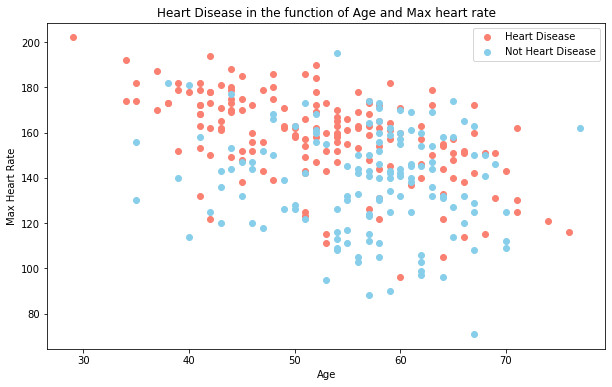

In [7]:
# Create another figure 
plt.figure(figsize = (10,6))
# Scatter With positive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
# scatter plot with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "skyblue");

# add some information 

plt.title("Heart Disease in the function of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","Not Heart Disease"])

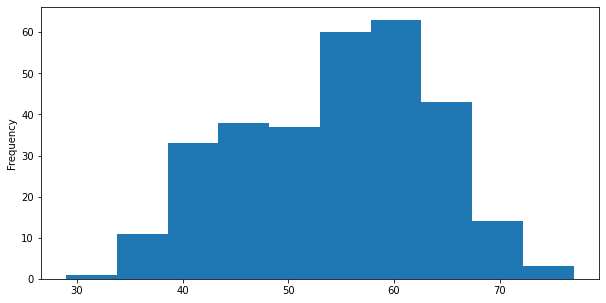

In [8]:
# Distibution Of the age 
df.age.plot.hist(figsize = (10,5));

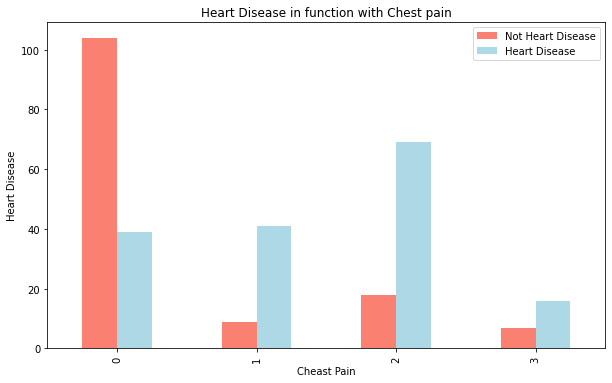

In [9]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize = (10,6),
                                 color = ["salmon","lightblue"]);
# Info & communication 

plt.title("Heart Disease in function with Chest pain")
plt.xlabel("Cheast Pain")
plt.ylabel("Heart Disease")
plt.legend(["Not Heart Disease","Heart Disease"]);

In [10]:
# Making a correlational matrix.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


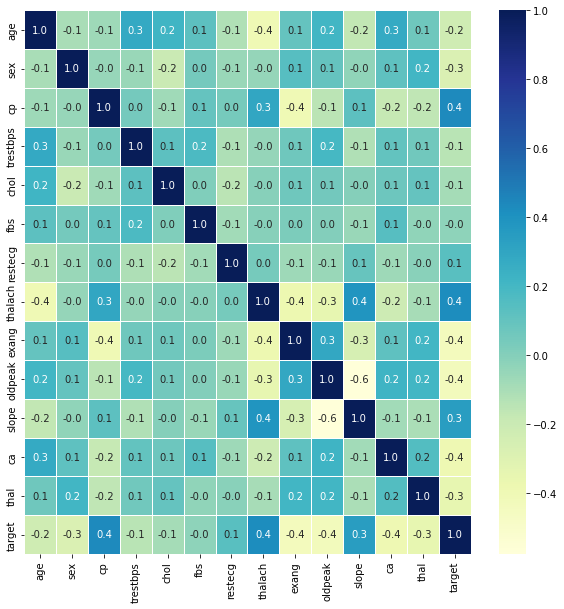

In [11]:
# making the correlation matrix bit Umderstandable/?
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                     annot=True,
                     linewidths=0.5,
                     fmt=".1f",
                     cmap="YlGnBu")

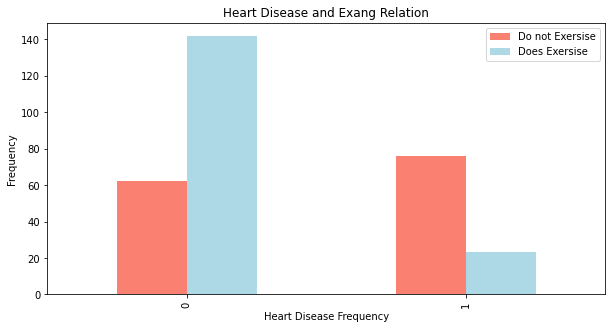

In [12]:
pd.crosstab(df.exang,df.target).plot(kind = "bar",
                                    figsize = (10,5),
                                    color = ["salmon","lightblue"])

# Communications 

plt.title("Heart Disease and Exang Relation")
plt.xlabel("Heart Disease Frequency")
plt.ylabel("Frequency")
plt.legend(["Do not Exersise","Does Exersise"]);

## 5.Modeling

1. **Using Logistic Regression**

2. **Random Forest Calssification**

3. **KNeibours Classification**




In [13]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [14]:
# Put All the modes in a Dictionary

models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# Create A function to fit and and score the models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates model
    models : a dictionary for the ML models.
    X_train : training data (no lables)
    X_test : testing data (no labels)
    y_train : training lables 
    y_test : test lables
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model do data
        model.fit(X_train,y_train)
        # Evaluate the moel and append its scores to model_Scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test=y_test)

model_scores

C:\Users\Admin\OneDrive\Desktop\samplePrj\prj1\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}


### Model Comparison

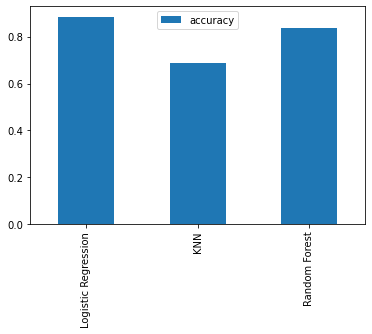

In [16]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

#### For Regression Model 
* `R^2 Method`
* `Root Mean square method` 
* `Mean Absolute`
* `Root mean square error`

#### For Classification model
* `Accurecy`
* `Precision`
* `Recall`
* `F1 score`

In [17]:

# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [18]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [19]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


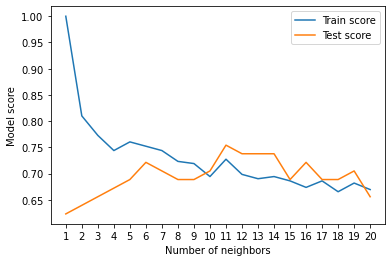

In [20]:

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


### Hyperparameter tuning with RandomizedSearchCV
**We're going to tune:**

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [21]:

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got Hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [22]:
# Tuning Logistic Regression 

np.random.seed(42)

# setup the randomForest calssifiear for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20,
                               verbose = True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [24]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we Have Tuned Logistic regression and Do not get any increse in Fitiing

In [25]:
# # Setup Random Seed
# np.random.seed(42)

# # Setup RandomizedSearchCV
# rs_rf = RandomizedSearchCV(RandomForestClassifier(),
#                           param_distributions=rf_grid,
#                           cv=5,
#                            n_iter=20,
#                           verbose=True)
# rs_rf.fit(X_train,y_train)

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
# Find The best Parameters 

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [27]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

Since Our Logistic Regresiion Provides The best score so far, we we'll try and improve them agin using GridSearchCV...

In [28]:
# Different Hyperparameters for logistic regression 

log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup the Grid Hyperparameter search for logistic regresion 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv= 5,
                         verbose=True)
# fit the grid hyper parameter search model
gs_log_reg.fit(X_train,y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [29]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [31]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classifiacation Report
* Precision 
* Recall
* F1 - Score

...and it would be greate if cross validation was used where Possible
to make comparison and evalute our trained model, First We need to make prediction. 

In [32]:
# make predict with tuned model
y_preds = rs_log_reg.predict(X_test)

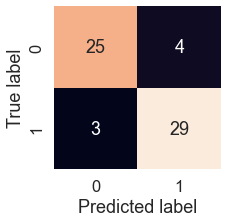

In [33]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

### ROC curve



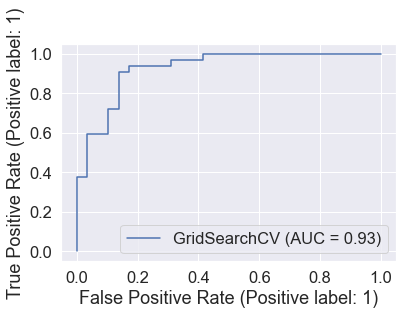

In [34]:
# PLot the Roc Curve and caluculate the AUC metic
plot_roc_curve(gs_log_reg,X_test,y_test);

### Confuion Metixx

In [35]:
# Confusion metixx 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


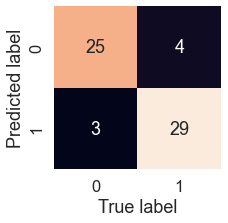

In [36]:
# Visualzation of the confusion matrix defining  afunction 

import seaborn as sns
sns.set(font_scale=1.5) # setting the font scale
def plot_conf_matix(y_test,y_preds):
    """
    Plotting a confusion matrix using seaborns's heatmap()
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_matix(y_test,y_preds)
    

In [37]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using Cross validation 

We're going to calculate precision, recall,and f1 score of our model using cross-validation and to do so we'll be using `Cross_val_score()`

In [38]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [40]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc = np.mean(cv_acc)

In [41]:
cv_pre = cross_val_score(clf,X,y,scoring="precision")
cv_pre = np.mean(cv_pre)

In [42]:
cv_recall = cross_val_score(clf,X,y,scoring="recall")
cv_recall = np.mean(cv_recall)

In [43]:
cv_f1 = cross_val_score(clf,X,y,scoring="f1")
cv_f1 = np.mean(cv_f1)

In [44]:
cv_acc,cv_f1,cv_pre,cv_recall

(0.8446994535519124,
 0.8673007976269721,
 0.8207936507936507,
 0.9212121212121213)

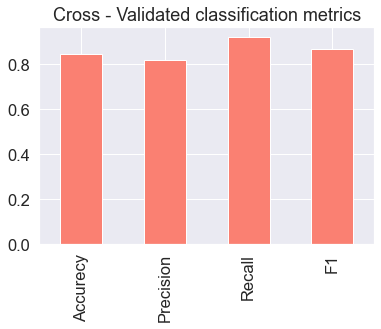

In [54]:
cv_metrices = pd.DataFrame({"Accurecy" : cv_acc,
                        "Precision" :cv_pre,
                        "Recall":cv_recall,
                        "F1":cv_f1},index=[0])
cv_metrices.T.plot.bar(title = "Cross - Validated classification metrics",legend = False,color = "salmon");

## FEATURE IMPORATANCE

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...


In [48]:
# Fit an istance of logistic regression

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train,y_train);

In [49]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [50]:
# Match the coef's of the features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<AxesSubplot:title={'center':'Feature Importance'}>

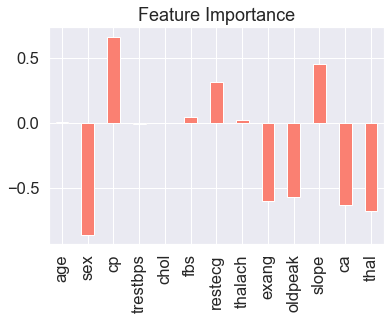

In [53]:
features_df = pd.DataFrame(feature_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance",legend = False,color = "salmon")

# 6. Experimentation 

* Could you collect more data??
* Could you try a better model?? Like catBoost or XGBoost?
* Could we improve the current model ??(Beyond what we've done so far)
    1. Rememner  That we have not tuned all the Hyperparameters 
    2. We have Dropped a lotss of data During the process
* Finding Solutions on the Community